In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import os

# EDA

In [2]:
train_df = pd.read_excel("data/raw/train(1).xlsx")
test_df = pd.read_excel("data/raw/test2.xlsx")
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (16209, 21)
Test shape: (5404, 20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

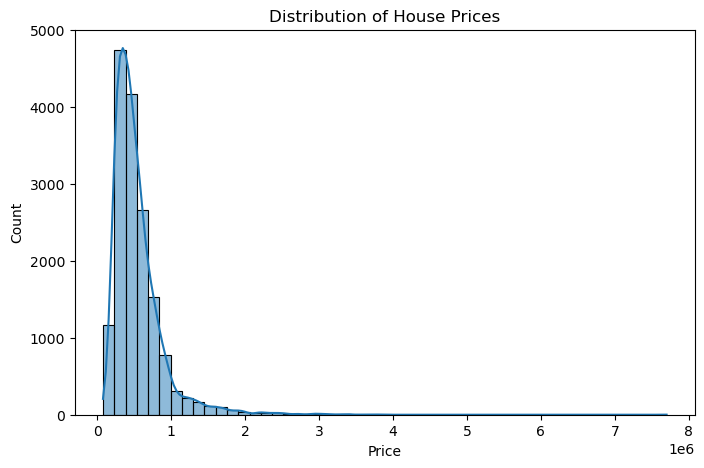

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

House prices exhibit a right-skewed distribution, motivating log-based reasoning and robust models.

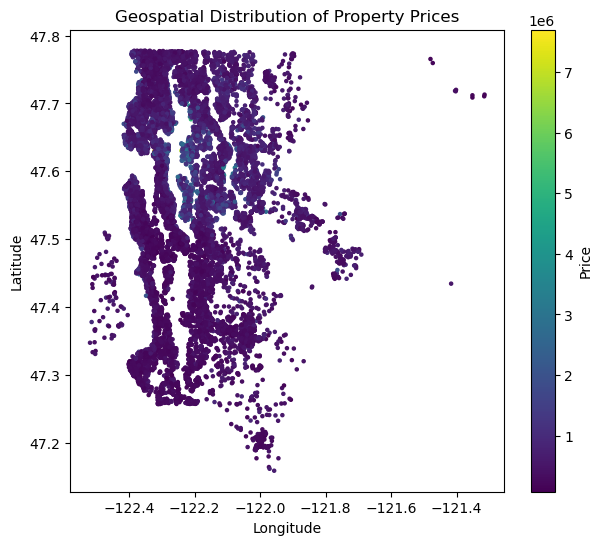

In [5]:
plt.figure(figsize=(7,6))
scatter = plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="viridis",
    s=5
)
plt.colorbar(scatter, label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Property Prices")
plt.show()

In [6]:
TARGET = "price"

FEATURES = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "sqft_above", "sqft_basement", "sqft_living15",
    "sqft_lot15", "condition", "grade", "view",
    "waterfront", "lat", "long"
]

X = train_df[FEATURES]
y = train_df[TARGET]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Training models using only tabular data

In [9]:
# Training model using Linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Prediction and Evaluation
y_pred = lin_reg.predict(X_val_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred))
r2_lr = r2_score(y_val, y_pred)

print("Linear reg RMSE:", rmse_lr)
print("Linear reg R²:", r2_lr)

Linear reg RMSE: 201835.65406134576
Linear reg R²: 0.6753678987060068


In [11]:
# Training model using Random Forest 
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [12]:
# Prediction and Evaluation
y_pred_rf = rf_reg.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

Random Forest RMSE: 128621.90652792976
Random Forest R²: 0.8681665626924989


In [13]:
# Training model using Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42)

gbr.fit(X_train, y_train) 

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [14]:
# Prediction and Evaluation
y_pred_gbr = gbr.predict(X_val)

rmse_gbr = mean_squared_error(y_val, y_pred_gbr)
r2_gbr   = r2_score(y_val, y_pred_gbr)

print("GBR RMSE:", rmse_gbr)
print("GBR R²:", r2_gbr)

GBR RMSE: 15550354667.875458
GBR R²: 0.8760815453241833


In [15]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "GBR"],
    "R2 score": [r2_lr, r2_rf, r2_gbr],
    "RMSE": [rmse_lr, rmse_rf, rmse_gbr]
})

results

,Model,R2 score,RMSE
0,Linear Regression,0.675368,2.018357e+05
1,Random Forest,0.868167,1.286219e+05
2,GBR,0.876082,1.555035e+10


Linear Regression is used as a simple baseline, while Random Forest achieved significantly better performance and is selected as the final tabular-only model. Feature scaling was applied only where required.

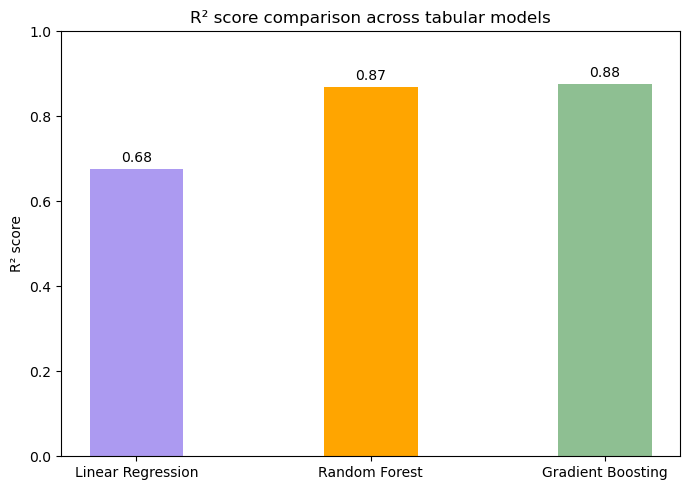

In [16]:
import matplotlib.pyplot as plt
# R2 values
models = ["Linear Regression", "Random Forest", "Gradient Boosting"]
r2_scores = [r2_lr, r2_rf, r2_gbr]
colors = ['#AC9AF1', "orange", "#8EBF92"] 
plt.figure(figsize=(7, 5))
bars = plt.bar(models, r2_scores, width=0.4, color=colors)

plt.ylabel("R² score")
plt.title("R² score comparison across tabular models")
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom")

plt.tight_layout()
plt.show()

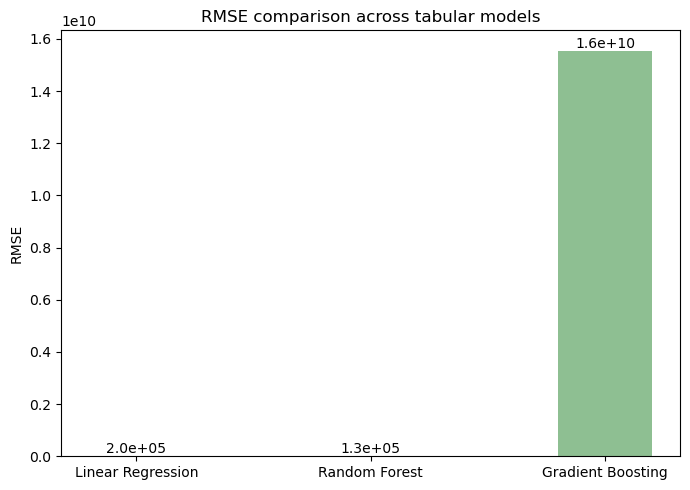

In [17]:
# RMSE values 
rmse_values = [rmse_lr, rmse_rf, rmse_gbr]
plt.figure(figsize=(7, 5))
colors = ['#AC9AF1', "orange", "#8EBF92"]
bars = plt.bar(models, rmse_values, width=0.4, color=colors)

plt.ylabel("RMSE")
plt.title("RMSE comparison across tabular models")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1e}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

Images found: 1001


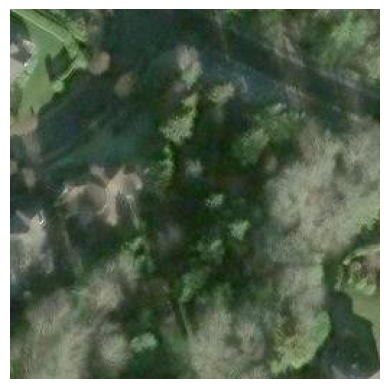

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import os

IMAGE_DIR = "data/images"

imgs = os.listdir(IMAGE_DIR)
print("Images found:", len(imgs))

img = Image.open(os.path.join(IMAGE_DIR, imgs[0]))
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
from tqdm.notebook import tqdm

In [20]:
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

In [21]:
class PropertyImageDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        prop_id = self.df.loc[idx, "id"]
        img_path = os.path.join(self.image_dir, f"{prop_id}.png")

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, prop_id

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

resnet = models.resnet18(pretrained=True)

# Removing final classification layer
resnet.fc = nn.Identity()

resnet = resnet.to(device)
resnet.eval()

Using device: cpu


/opt/anaconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [23]:
IMAGE_DIR = "data/images"

available_ids = [
    int(f.replace(".png", ""))
    for f in os.listdir(IMAGE_DIR)
    if f.endswith(".png")
]

image_df = pd.DataFrame({"id": available_ids})

print("Images available:", len(image_df))

Images available: 1000


In [24]:
image_dataset = PropertyImageDataset(
    image_df,
    IMAGE_DIR,
    transform=image_transforms)

image_loader = DataLoader(
    image_dataset,
    batch_size=8,
    shuffle=False,
    num_workers=0  )

In [25]:
image_features = {}
with torch.no_grad():
    for images, prop_ids in tqdm(image_loader):
        images = images.to(device)

        features = resnet(images)      
        features = features.cpu().numpy()

        for pid, feat in zip(prop_ids, features):
            image_features[int(pid)] = feat

  0%|          | 0/125 [00:00<?, ?it/s]

In [26]:
image_features_df = pd.DataFrame.from_dict(
    image_features,
    orient="index")

image_features_df.reset_index(inplace=True)
image_features_df.rename(columns={"index": "id"}, inplace=True)

print("Image feature shape:", image_features_df.shape)
image_features_df.head()

Image feature shape: (1000, 513)


,id,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,4139490210,0.498821,0.024314,0.043676,0.818754,0.025511,0.056480,0.125192,0.597798,1.097186,...,0.257897,0.449075,0.361552,0.562218,0.115765,0.151662,0.176321,0.351644,0.168205,0.000000
1,2742100009,1.611232,0.002356,2.614550,0.854373,1.061258,0.171157,1.140688,2.705269,2.102861,...,0.584960,0.650341,0.445342,0.343495,0.000000,0.803697,1.169284,2.458817,0.051459,0.099053
2,3882300090,0.626979,1.595736,1.064309,1.447028,0.767408,0.211427,0.016710,0.338172,1.014378,...,1.043330,1.523605,0.455553,0.529182,0.064207,2.774123,0.775721,4.714707,0.332248,0.301625
3,3649100306,0.834299,1.002861,1.538935,0.713217,0.113223,0.296715,0.066911,1.223675,1.686240,...,0.421193,0.569666,0.043090,0.343838,0.000000,1.021726,0.803817,3.086299,0.025144,0.003081
4,8078600330,1.031408,0.398198,0.618890,2.651060,1.222830,0.062397,0.459544,0.973825,0.144235,...,0.000000,1.106152,0.640977,0.019773,0.544131,1.706021,0.092040,2.182582,0.052407,0.000000


In [27]:
image_features_df.to_csv(
    "data/processed/image_embeddings.csv",
    index=False)

In [28]:
image_features_df.iloc[0, 1:].describe()

count    512.000000
mean       0.362084
std        0.583966
min        0.000000
25%        0.042605
50%        0.162647
75%        0.411169
max        5.595813
Name: 0, dtype: float64

In [29]:
image_features_df = pd.read_csv("data/processed/image_embeddings.csv")

# Merging embeddings with tabular data

In [30]:
train_mm = train_df.merge(image_features_df, on="id", how="inner")
test_mm  = test_df.merge(image_features_df, on="id", how="inner")

print("Train multimodal shape:", train_mm.shape)
print("Test multimodal shape:", test_mm.shape)

Train multimodal shape: (1011, 533)
Test multimodal shape: (2, 532)


In [31]:

TARGET = "price"
TABULAR_FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "condition",
    "grade",
    "view",
    "waterfront",
    "lat",
    "long"
]
IMAGE_FEATURES = [col for col in train_mm.columns if col.startswith("0") or col.isdigit()]

In [32]:
IMAGE_FEATURES = image_features_df.columns.tolist()
IMAGE_FEATURES.remove("id")

print("Number of image features:", len(IMAGE_FEATURES))

Number of image features: 512


In [33]:
from sklearn.model_selection import train_test_split

X_tab = train_mm[TABULAR_FEATURES]
X_img = train_mm[IMAGE_FEATURES]
y     = train_mm[TARGET]

X_tab_train, X_tab_val, \
X_img_train, X_img_val, \
y_train, y_val = train_test_split(
    X_tab, X_img, y,
    test_size=0.2,
    random_state=42
)

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_img_train_scaled = scaler.fit_transform(X_img_train)
X_img_val_scaled   = scaler.transform(X_img_val)

# Training multimodal models

In [35]:
# Using CNN + RandomForest
import numpy as np

X_mm_train = np.hstack([X_tab_train.values, X_img_train.values])
X_mm_val   = np.hstack([X_tab_val.values,   X_img_val.values])
mm_model = RandomForestRegressor(
      n_estimators=200,
    random_state=42,
    n_jobs=-1
)

mm_model.fit(X_mm_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [36]:
# Prediction and Evaluation
y_pred_mm = mm_model.predict(X_mm_val)

rmse_mm = mean_squared_error(y_val, y_pred_mm)
r2_mm   = r2_score(y_val, y_pred_mm)

print("Multimodal (CNN + RF) RMSE:", rmse_mm)
print("Multimodal (CNN + RF) R²:", r2_mm)

Multimodal (CNN + RF) RMSE: 24713436845.502243
Multimodal (CNN + RF) R²: 0.6923402036933615


In [37]:
# Using CNN + GBR 
import numpy as np

X_mm2_train = np.hstack([X_tab_train.values, X_img_train.values])
X_mm2_val   = np.hstack([X_tab_val.values,   X_img_val.values])
mm2_model = GradientBoostingRegressor(
     n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42)

mm2_model.fit(X_mm2_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42)

In [38]:
# Prediction and Evaluation
y_pred_mm2 = mm2_model.predict(X_mm2_val)

rmse_mm2 = mean_squared_error(y_val, y_pred_mm2)
r2_mm2   = r2_score(y_val, y_pred_mm2)

print("Multimodal (CNN + GBR) RMSE:", rmse_mm2)
print("Multimodal (CNN + GBR) R²:", r2_mm2)

Multimodal (CNN + GBR) RMSE: 19619827300.83082
Multimodal (CNN + GBR) R²: 0.7557510066818728


In [39]:
# Using CNN + PCA and Ridge
pca = PCA(n_components=0.95, random_state=42)
X_img_train_pca = pca.fit_transform(X_img_train_scaled)
X_img_val_pca   = pca.transform(X_img_val_scaled)

print("Reduced image feature size:", X_img_train_pca.shape[1])

Reduced image feature size: 217


In [40]:
X_mm3_train = np.hstack([X_tab_train.values, X_img_train_pca])
X_mm3_val   = np.hstack([X_tab_val.values,   X_img_val_pca])

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge_mm = Ridge(alpha=10.0, random_state=42)
ridge_mm.fit(X_mm3_train, y_train)

Ridge(alpha=10.0, random_state=42)

In [42]:
# Prediction and Evaluation
y_pred_mm3 = ridge_mm.predict(X_mm3_val)

rmse_mm3 = np.sqrt(mean_squared_error(y_val, y_pred_mm3))
r2_mm3   = r2_score(y_val, y_pred_mm3)

print("Multimodal (CNN + PCA and Ridge) R²:", r2_mm3)
print("Multimodal (CNN + PCA and Ridge) RMSE:", rmse_mm3)

Multimodal (CNN + PCA and Ridge) R²: 0.5360530840038492
Multimodal (CNN + PCA and Ridge) RMSE: 193048.01705548214


In [43]:
# Comparision Table
comparison_df = pd.DataFrame({
    "Model": ["CNN + RF", "CNN + GBR ","PCA and Ridge"],
    "R² Score": [r2_mm, r2_mm2, r2_mm3],
    "RMSE": [ rmse_mm, rmse_mm2, rmse_mm3]
})

comparison_df

,Model,R² Score,RMSE
0,CNN + RF,0.692340,2.471344e+10
1,CNN + GBR,0.755751,1.961983e+10
2,PCA and Ridge,0.536053,1.930480e+05


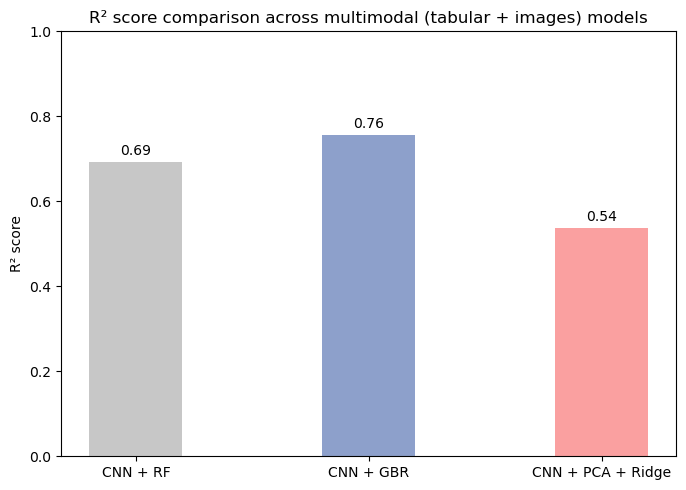

In [44]:
import matplotlib.pyplot as plt

# R² values
models1 = ["CNN + RF", "CNN + GBR", "CNN + PCA + Ridge"]
r2_scores1 = [r2_mm, r2_mm2, r2_mm3]
colors1 = ["#c7c7c7", "#8da0cb", "#FAA0A0"] 
plt.figure(figsize=(7, 5))
bars = plt.bar(models1, r2_scores1, width=0.4, color=colors1)

plt.ylabel("R² score")
plt.title("R² score comparison across multimodal (tabular + images) models")
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

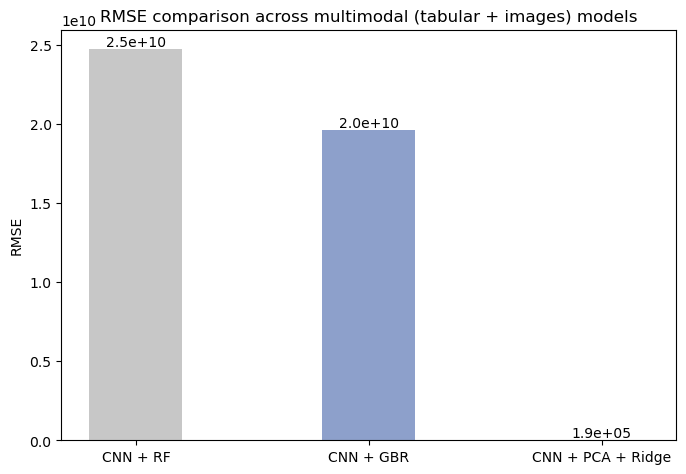

In [45]:
# RMSE values 
rmse_values1 = [rmse_mm, rmse_mm2, rmse_mm3]
colors1 = ["#c7c7c7", "#8da0cb", "#FAA0A0"] 
plt.figure(figsize=(7, 5))
bars = plt.bar(models1, rmse_values1, width=0.4, color=colors1)

plt.ylabel("RMSE")
plt.title("RMSE comparison across multimodal (tabular + images) models")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1e}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

# Training final model (GBR - Tabular only)

In [46]:
TABULAR_FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "condition",
    "grade",
    "view",
    "waterfront",
    "lat",
    "long"
]

X_test = test_df[TABULAR_FEATURES]

print("X_test shape:", X_test.shape)
print("Test DF shape:", test_df.shape)

X_test shape: (5404, 11)
Test DF shape: (5404, 20)


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

final_gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

final_gbr.fit(
    train_df[TABULAR_FEATURES],
    train_df["price"]
)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42)

In [48]:
# Final Prediction
test_predictions = final_gbr.predict(X_test)

print("Predictions length:", len(test_predictions))
print("Test IDs length:", len(test_df["id"]))

Predictions length: 5404
Test IDs length: 5404


In [49]:
# Creating CSV file
submission_df = pd.DataFrame({
    "id": test_df["id"].values,
    "predicted_price": test_predictions
})

submission_df.head()

,id,predicted_price
0,2591820310,3.616533e+05
1,7974200820,9.170099e+05
2,7701450110,1.063628e+06
3,9522300010,1.994475e+06
4,9510861140,6.909221e+05


In [50]:
submission_df.to_csv("24114036_final.csv", index=False)